
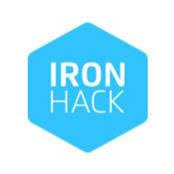

# Projeto final do curso de Data Analytics PT-JUL-2020, Ironhack São Paulo

## Tema abordado: Técnicas de Machine Learning para Análise de Texto

**IRONHACKERS: GIULIANA VICENTE E WAGNER FRANÇA**

O presente projeto tem por objetivo analisar os textos produzidos por onze figuras políticas através da extração de dados de suas contas do Twitter. Para sua realização foi aplicado NLTK e SKLEARN com objetivo de treinar modelos de Regressão Logística que identificassem à qual figura política pertencem ou podem pertencer determinadas frases.

In [3]:
import nltk 
from nltk.stem import RSLPStemmer
import re
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression as lr
from sklearn.model_selection import train_test_split

#  Importando csv 


**Figuras Políticas escolhidas:  Dilma Rousseff, Manuela d'Ávila, Marina Silva, Damares Alves, Bruno Covas, Guilherme Boulos, Jair Bolsonaro, Lula, Celso Russomanno, João Dória e Marcelo Crivella.**

In [4]:
tweet_covas = pd.read_csv ('C:/Users/User/Aulas_ironhack/Projeto/Projeto_Final/Tweets para explorar/covas-2020.csv')
tweet_boulos = pd.read_csv ('C:/Users/User/Aulas_ironhack/Projeto/Projeto_Final/Tweets para explorar/boulos-2020.csv').sample(2100)
tweet_russomanno = pd.read_csv ('C:/Users/User/Aulas_ironhack/Projeto/Projeto_Final/Tweets para explorar/celsorussomanno-2020.csv')
tweet_doria = pd.read_csv ('C:/Users/User/Aulas_ironhack/Projeto/Projeto_Final/Tweets para explorar/doria-2020.csv').sample(2100)
tweet_bolsonaro = pd.read_csv ('C:/Users/User/Aulas_ironhack/Projeto/Projeto_Final/Tweets para explorar/jairbolsonaro-2020.csv').sample(2100)
tweet_crivella = pd.read_csv ('C:/Users/User/Aulas_ironhack/Projeto/Projeto_Final/Tweets para explorar/crivela-2020.csv')
tweet_lula = pd.read_csv ('C:/Users/User/Aulas_ironhack/Projeto/Projeto_Final/Tweets para explorar/lula-2020.csv').sample(2100)
tweet_damares = pd.read_csv ('C:/Users/User/Aulas_ironhack/Projeto/Projeto_Final/Tweets para explorar/damares-2020.csv').sample(2100)
tweet_dilma = pd.read_csv ('C:/Users/User/Aulas_ironhack/Projeto/Projeto_Final/Tweets para explorar/dilmabr-2020.csv')
tweet_manuela = pd.read_csv ('C:/Users/User/Aulas_ironhack/Projeto/Projeto_Final/Tweets para explorar/ManuelaDavila-2020.csv').sample(2100)
tweet_marina = pd.read_csv ('C:/Users/User/Aulas_ironhack/Projeto/Projeto_Final/Tweets para explorar/MarinaSilva-2020.csv')

In [5]:
covas = tweet_covas [["tweet" , "name"]]
boulos = tweet_boulos [["tweet" , "name"]]
russomanno = tweet_russomanno [["tweet" , "name"]]
doria = tweet_doria [["tweet" , "name"]]
bolsonaro = tweet_bolsonaro [["tweet" , "name"]]
crivella = tweet_crivella [["tweet" , "name"]]
lula = tweet_lula [["tweet" , "name"]]
damares = tweet_damares [["tweet" , "name"]]
dilma = tweet_dilma [["tweet" , "name"]]
manuela = tweet_manuela [["tweet" , "name"]]
marina = tweet_marina [["tweet" , "name"]]

## Base de dados para treino e teste

In [6]:
tweets_treino = pd.concat([covas, boulos, russomanno, doria, bolsonaro, crivella, lula, dilma, damares, manuela, marina],ignore_index = True)
tweets_teste = pd.concat([covas.sample(100), boulos.sample(100), russomanno.sample(100), doria.sample(100), bolsonaro.sample(100), crivella.sample(100), lula.sample(100), dilma.sample(100), damares.sample(100), manuela.sample(100), marina.sample(100)],ignore_index = True)

## Acrescentando a coluna Stemmer para testar a veracidade das stop words

In [7]:
stop_words = nltk.corpus.stopwords.words('portuguese')

In [8]:
def steming(df):
    

    for x in range(len(df['tweet'])):
            phrase = []
            tt = re.sub('[^\w\s]|\d','',df.iloc[x][0]).lower().split()
            for y in tt:
                if y not in stop_words:
                    phrase.append(RSLPStemmer().stem(y))
            joinha = ' '.join(map(str, phrase))
            df['tweet'].iloc[x] = joinha
            
    return df

## Aplicando Stemmer no treino

In [9]:
steming(tweets_treino)

,tweet,name
0,igor_k dia sáb top,Bruno Covas
1,obrig paul milhã vot ench esperanç hor transfo...,Bruno Covas
2,cole brun cov todosporsaopaul httpstcosldrgajzjn,Bruno Covas
3,vot todosporsaopaul,Bruno Covas
4,dur tod campanh preocup verdad palavr bonit pr...,Bruno Covas
...,...,...
15894,irrespons negacion climá agrav aind situ tom m...,Marina Silva
15895,neglig primeiroministr australi scott morrison...,Marina Silva
15896,apavor ver terr incêndi florest austrál mat pe...,Marina Silva
15897,estratég trump ataqu busc reaviv nacion conser...,Marina Silva


In [10]:
def digite():    
    frase = input('Digite uma frase: ')
    z = pd.DataFrame([frase], columns=['tweet'])
    steming(z)
    w = cv.transform (z['tweet']).todense()
    g = pd.DataFrame(w,columns=cv.get_feature_names())
    #results = pd.DataFrame(model.predict_proba(teste1),columns = model.classes_)
    wg = pd.DataFrame(model.predict_proba(g),columns = model.classes_).T
    return wg.reset_index().rename(columns={0: "Probabilidade", "index": "Figura_Politica"})

    #return results[model.predict(teste1)[0]]

## Aplicando a vetorização dos dados de texto e transformando-os em uma matriz de frequência

In [11]:
cv = CountVectorizer()
cv.fit(tweets_treino['tweet'])

CountVectorizer()

In [12]:
matrix = cv.transform (tweets_treino['tweet']).todense()

In [13]:
cv.get_feature_names()

['__ucho',
 '_anapastor_',
 '_brunaf',
 '_carolmcost',
 '_clacs',
 '_goingthell',
 '_heloisa_helen',
 '_leolima',
 '_lucasfigueired',
 '_makavelijon',
 '_nossieg',
 '_pablitoagui',
 '_pinh',
 '_prez',
 '_sapata',
 '_uivan',
 '_zevagn',
 'a_estupid',
 'aa',
 'aaaalô',
 'aaaeguarujásp',
 'ab',
 'aba',
 'abaf',
 'abaix',
 'abaixoacens',
 'abaixoassin',
 'abal',
 'aban',
 'abandon',
 'abastec',
 'abastecimentosegurospgovbr',
 'abat',
 'abbey',
 'abc',
 'abd',
 'abdi_digit',
 'abdic',
 'abduch',
 'abduç',
 'abelh',
 'abenço',
 'abençõ',
 'aberr',
 'abert',
 'abeshinz',
 'abidjã',
 'abin',
 'abism',
 'abjet',
 'abneg',
 'abol',
 'abomin',
 'abon',
 'abord',
 'abort',
 'about',
 'abp',
 'abr',
 'abrac',
 'abraceomaraj',
 'abraceomarajó',
 'abraceori',
 'abracosolidari',
 'abracovirt',
 'abracovirtualesefossevoceorg',
 'abrah',
 'abrahamweint',
 'abrahim',
 'abrang',
 'abraz',
 'abraç',
 'abraçál',
 'abres',
 'abrevi',
 'abrig',
 'abril',
 'abrilazul',
 'abrilhant',
 'abrilindígen',
 'abrir',


In [14]:
teste = pd.DataFrame(matrix,columns=cv.get_feature_names())

In [15]:
X = teste
y = tweets_treino['name']

## Treinando Modelo de Regressão Logística

In [16]:
model = lr(solver='lbfgs', max_iter=1000)
model.fit(X,y)

LogisticRegression(max_iter=1000)

In [17]:
#testando modelo
model.predict(X)

array(['Bruno Covas', 'Bruno Covas', 'Bruno Covas', ..., 'Marina Silva',
       'Marina Silva', 'Marina Silva'], dtype=object)

In [18]:
model.classes_

array(['Bruno Covas', 'Celso Russomanno', 'Damares Alves',
       'Dilma Rousseff', 'Guilherme Boulos', 'Jair M. Bolsonaro',
       'João Doria', 'Lula', 'Manuela', 'Marcelo Crivella',
       'Marina Silva'], dtype=object)

In [19]:
digite()

Digite uma frase: Lula Livre


,Figura_Politica,Probabilidade
0,Bruno Covas,0.000802
1,Celso Russomanno,0.002616
2,Damares Alves,0.007556
3,Dilma Rousseff,0.026777
4,Guilherme Boulos,0.021914
5,Jair M. Bolsonaro,0.031384
6,João Doria,0.003883
7,Lula,0.844159
8,Manuela,0.048946
9,Marcelo Crivella,0.002259
